In [30]:
!pip install simpleaudio
!pip install opencv-python
!pip install plotly
import numpy as np
import matplotlib.pyplot as plt
import cis
import scipy.fftpack as sfft
import matplotlib.mlab as mlab
import scipy.signal as ss

/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88



In [2]:
t = np.arange(0,1,1/8000)
a = 0.8
f = 440
y = a*np.sin(2*np.pi*f*t)

In [5]:
np.set_printoptions(precision=3)
y2 = np.sin(np.arange(0,1,0.01))

In [6]:
cis.audioplay(y,8000)

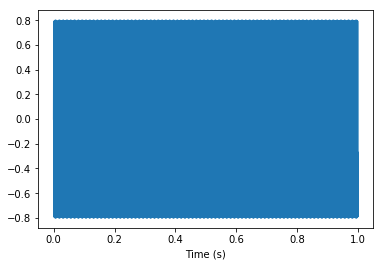

In [12]:
plt.figure()
plt.plot(t,y,'-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

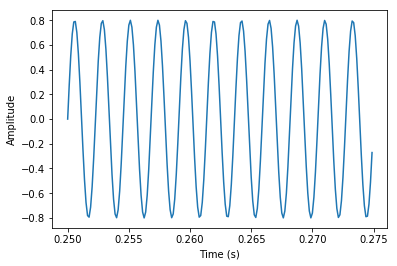

In [14]:
r = np.arange(2000,2200)
plt.figure()
plt.plot(t[r],y[r],'-')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

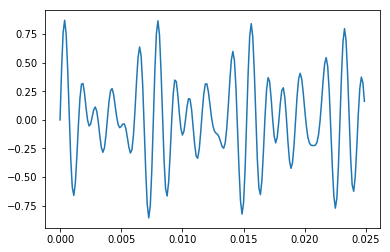

In [20]:
# 波形の重ね合わせ
fs = 8000
t = np.arange(0,1,1/fs)
a = 0.3
y523 = a*np.sin(2*np.pi*523*t)
y660 = a*np.sin(2*np.pi*660*t)
y784 = a*np.sin(2*np.pi*784*t)
yy = y523+y660+y784
cis.audioplay(yy,fs)
r = np.arange(200)
plt.figure()
plt.plot(t[r],yy[r])
plt.show()

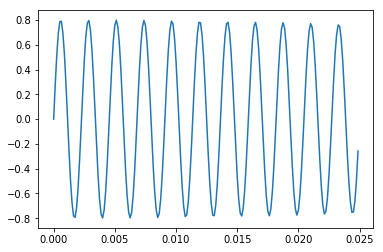

In [22]:
a = 0.4
y438 = a*np.sin(2*np.pi*438*t)
y442 = a*np.sin(2*np.pi*442*t)
yy = y438+y442
cis.audioplay(yy,fs)
r = np.arange(200)
plt.figure()
plt.plot(t[r],yy[r])
plt.show()

In [23]:
# 連続再生
cis.audioplay(np.hstack((y523,y660)),fs)

In [26]:
v, fs = cis.wavread('audio/vibra8.wav')
t = np.arange(0,1,1/fs)
f = 440
a = 0.1
ysin = a*np.sin(2*np.pi*f*t)
# vmix = v+ysin
print(v.shape)
print(ysin.shape)

(26000,)
(8000,)


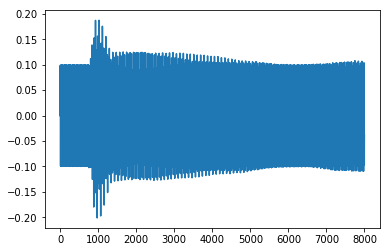

In [28]:
vmix = v[7000:15000]+ysin
cis.audioplay(vmix,fs)
plt.figure()
plt.plot(vmix)
plt.show()

In [29]:
# 保存
cis.wavwrite('audio/mixed.wav',vmix,fs)

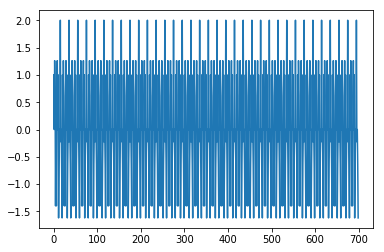

In [36]:
# FFT
fs = 100
t = np.arange(0,7,1/fs)
y = np.sin(2*np.pi*15*t)+np.cos(2*np.pi*40*t)
cs = sfft.fft(y[:600])
plt.figure()
plt.plot(y,'-')
#plt.plot(np.abs(cs),'--')
plt.show()